In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
from IPython.display import HTML
from PIL import Image
from IPython.display import display, clear_output
from functions import SMA, Trend
from statsmodels.graphics import tsaplots
import statsmodels.api as sm
from dimension import Hurst, Dimension_BC_img, Dimension_avg, Dimension_BС_window, Dimension_Hurst_window, Dimension_Avg_window
import warnings
warnings.filterwarnings('ignore')

<center><h1>
Исследование различных методов расчета фрактальной размерностидля анализа валютного рынка
</center></h1>

<h2><center>Оглавление</center></h2>
<br>
<ul>
    <li><a href='#p1'>Введение</a></li>
    <li><a href='#p2'>Использование методов определения фрактальной размерности на стохастических данных</a></li>
    <li><a href='#p3'>Исследование фрактальных особенной рынков валют (Значение курса)</a></li>
    <li><a href='#p4'>Исследование фрактальных особенной рынков валют (Объем торгов)</a></li>
    <li><a href='#p5'>Оценка корреляции между фрактальной размерностью и скользящими средними, трендами</a></li>
    <li><a href='#p7'>Заключение</a></li>
</ul>

<h2><font color='black'>
Введение
</font><a id="p1"></a></h2>

В современном мире существует большое количество валютных пар, торгуемых на биржах. Исследование рынков является важным направлением исследования экономики и математики на протяжении всего времени их существования. Направление фрактального анализа валютного рынка заложил в 70-е годы ХХ века Бенуа Мандельброт. До этого же считалось, что валютный рынок подчиняется центральной предельной теореме (или закону больших чисел), утверждающей, что большое количество наблюдений при распределении будет сводиться к нормальному распределению. Основные свойства фракталов временных рядов: фрактальная размерность всегда находится в диапазоне от 1 до 2, масштабной инвариантности, образуют определенную структуру с уникальными особенностями, обладают в «памятью» о своих «начальных условиях».

Актуальность исследуемой темы обуславливается непрекращающимся интересом ученых к поиску методов прогнозирования валютного и фондового рынков. 

Особенностью данной работы является исследование временных рядов рынка валютных пар, которые рассматриваются не как чистый фрактал, а скорее как фрактал подобная структура, которой свойственно самоподобие. Стоит учитывать, что факторы влияния на цену могут обладать различной силой, но при этом сохранять свойство самоподобия. Новизной данного исследования выступает рассмотрение в качестве фрактальной структуры не только курса цены валют, но и объемов торгов по исследуемым валютным парам. В данной работе исследуется отношение стоимостей канадского доллара, китайской юани, российского рубля к доллару США. 

Фрактал - геометрическая форма, которая может быть разделена на части, каждая из которых - уменьшенная версия целого.

Геометрический фрактал - это объект, который имеет самоподобную структуру на разных масштабах. Самоподобие означает, что части объекта похожи на весь объект. Например, фрактальное дерево имеет ветви, которые похожи на дерево в целом. В качестве примера рассмотри салфетку Серпинского.

<center><img src="images/Салфетка_Серпинского.jpg"/></center>

Основной характеристикой фрактального объекта является фрактальная размерность D, определяемая по классическому методу как:

$$ D = \lim\limits_{\delta \to 0} \frac{\ln(N(\delta))}{\ln(1/\delta)} $$
<br>
<center>где N - число клеток, занятых объектом, $\delta$ - размер клетки<center>

Как можно увидеть на изображении,треугольник(салфетка) Серпинского состоит из 3 копий самого себя, уменьшенной в 2 раза.

<center>$ N(\delta/2) = 3N(\delta) $, фрактальная размерность определяется как $log_2 3 ≈ 1,58 $<center>

Сопсобы нахождения фрактальной размерности

Первый - это классический клеточный способ, когда график накрывают серией сеток и определяют фрактальную размерность точно так же, как и для геометрических фракталов. Для нахождения размерности была написана функция, покрывающая изображения квадратами различного размера и подсчётом количества квадратов захвативших изображение. Проверку работоспособности данной функции проведем на треугольнике(салфетке) Серпинского.

Уже известный нам квадрат(ковер) и треугольник(салфетка) Серпинского соответственно.

<center>
</tr> 
<td style="text-align:center"> <img src="images/Салфетка_Серпинского.jpg" style="width: 250px; display: block; margin: 0 auto;"/> </td> 
</tr> 
<tr>
</br>
<td style="text-align:center"> $Размерность = log_2 3 ≈ 1,58 $ </td> 
</tr>
</center>

In [43]:
def Dimension_BC_img(path, show=True, Dimension=False):
    results = []
    steps = [i for i in range(1, 100, 1)]

    img = (~np.asarray(Image.open(path).convert('1'))).astype(int)
    # Вывод размера изображения
    # print(img.shape)

    for step in steps:
        count = 0
        for i in range(1, img.shape[0], step):
            for j in range(1, img.shape[1], step):
                # Получаем срез массива
                window = img[i:i + step, j:j + step]
                # Прибавляем если сумма окна больше нуля
                if window.sum() > 0:
                    count += 1
        results.append(count)

    x = [math.log(step) for step in steps]
    y = [math.log(result) for result in results]

    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)

    D = round(p[1] * (-1), 2)
    std = round(np.std(y), 2)

    plt.figure(figsize=(15, 5))
    plt.scatter(x, y, color='red')
    plt.plot(x, p(x))

    plt.ylabel("ln(Кол-во занятых квадратов)")
    plt.xlabel("ln(Масштаб)")

    plt.title(f'Размерность = {D}, стандартное отклонение {std}')

    if show:
        plt.show()
    else:
        plt.close()

    if Dimension:
        return D
    return [x, y]

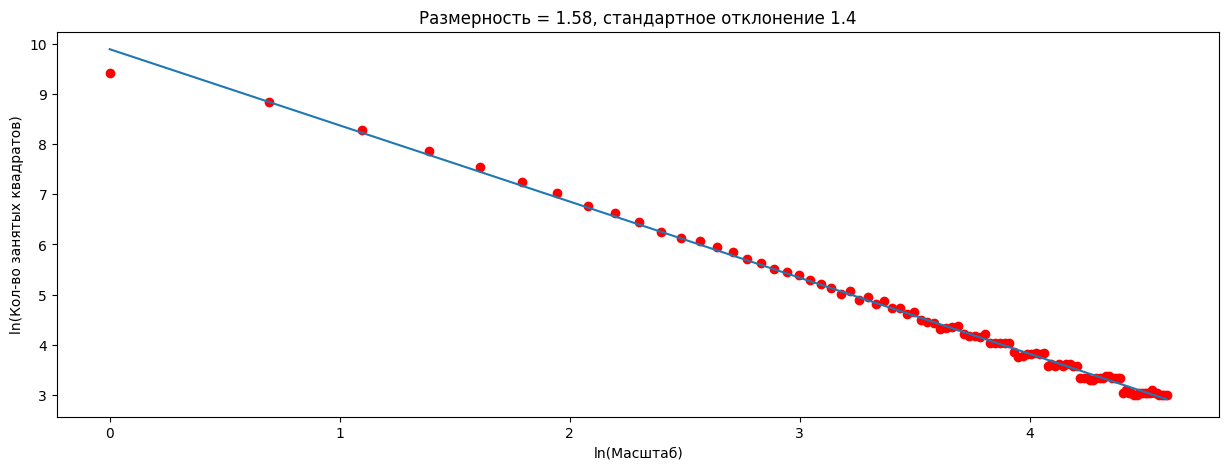

In [44]:
test = Dimension_BC_img('images/Салфетка_Серпинского.jpg')

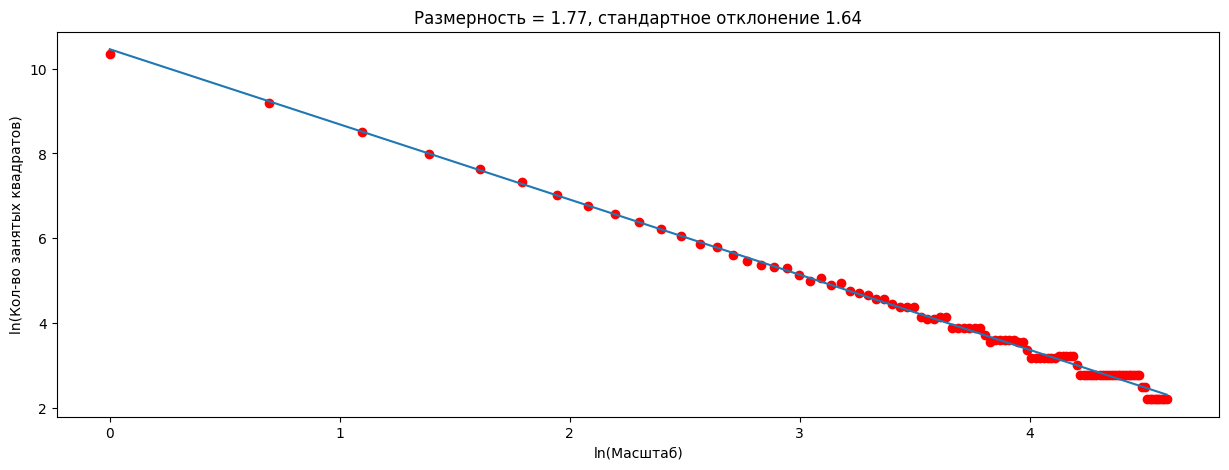

In [35]:
test = Dimension_BC_img('images/Ковер_Серпинского.jpg')

Как видно из результатов исследования, фрактальная размерность рассчитывается с точностью первого разряда, данная точность обуславливается особенностью обработки изображений, но является приемлимой.
Однако данный метод не всегда может быть использован для анализа фрактальных свойств временных рядов. Поэтому для расчёта фрактальной размерности определим еще два способа.

Второй способ для исследования фрактальных временных рядов был предложен Бенуа Мандельбротом и базируется на исследованиях проведенных английским исследователем Херстом и носит название R/S метода. Он построен на анализе размаха параметра (наибольшим и наименьшим значением на изучаемом отрезке) и среднеквадратичного отклонения. 

И третьим является способ, основанный на изменении длины кривой в зависимости от масштаба. Если кривая близка к фрактальной, то с уменьшением масштаба длина кривой будет возрастать степенным образом 

<h2><font color='black'>
    Использование методов определения фрактальной размерности на стхастических данных
</font><a id="p2"></a></h2>

Проведем анализ используемых методов на стохастических данных. Размерность в данном случае должна стремиться к 1.5

In [5]:
rnd = pd.DataFrame(np.random.randint(0, 100, size=(1000,1)), columns=list('R'))

In [6]:
rnd['index'] = [i for i in range(len(rnd))]

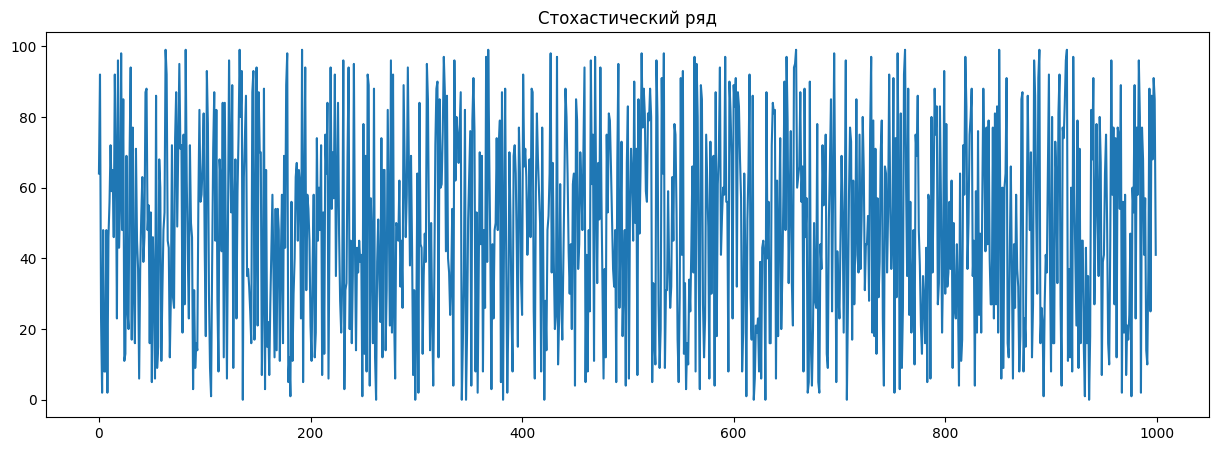

In [7]:
plt.figure(figsize=(15,5))
plt.plot(rnd['index'], rnd['R'])
plt.title('Стохастический ряд')
plt.show()

In [8]:
plt.figure(figsize=(100,20), dpi=130)
plt.plot(rnd['index'], rnd['R'])
plt.axis('off')
plt.savefig('random.jpg', bbox_inches='tight', pad_inches=0)
plt.close()

### Размерность рассчитанная с помощью метода Box Counting

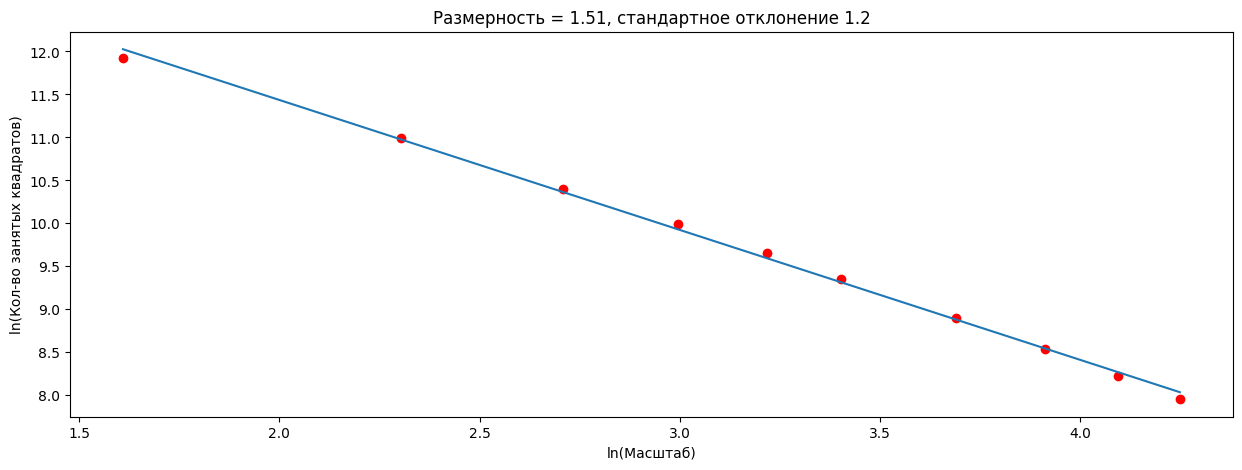

In [9]:
test = Dimension_BC_img('random.jpg')

### Размерность рассчитанная с помощью коэф-та Хёрста

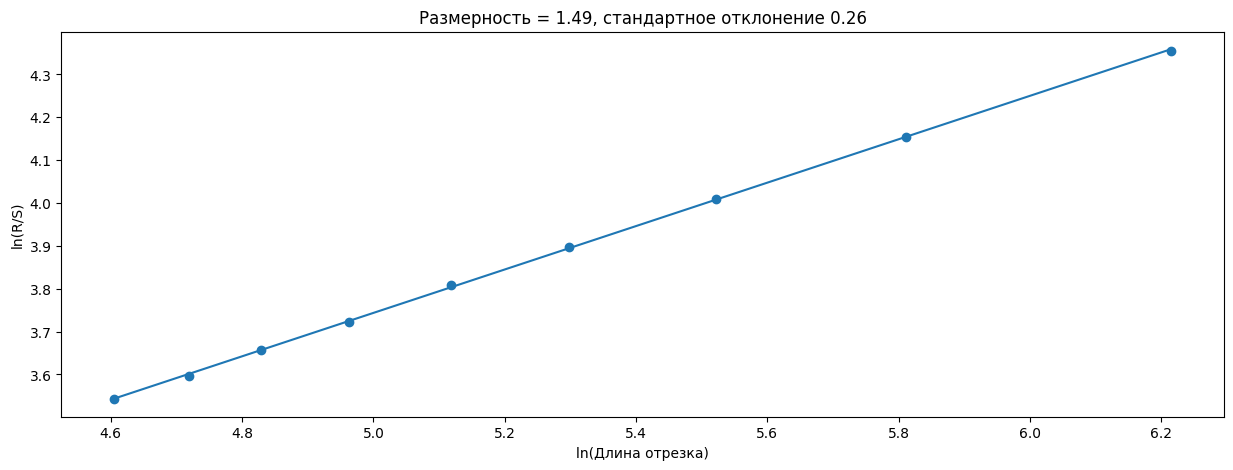

In [10]:
Dimension_Hurst = Hurst(rnd['R'])

### Размерность рассчитанная через усреднение

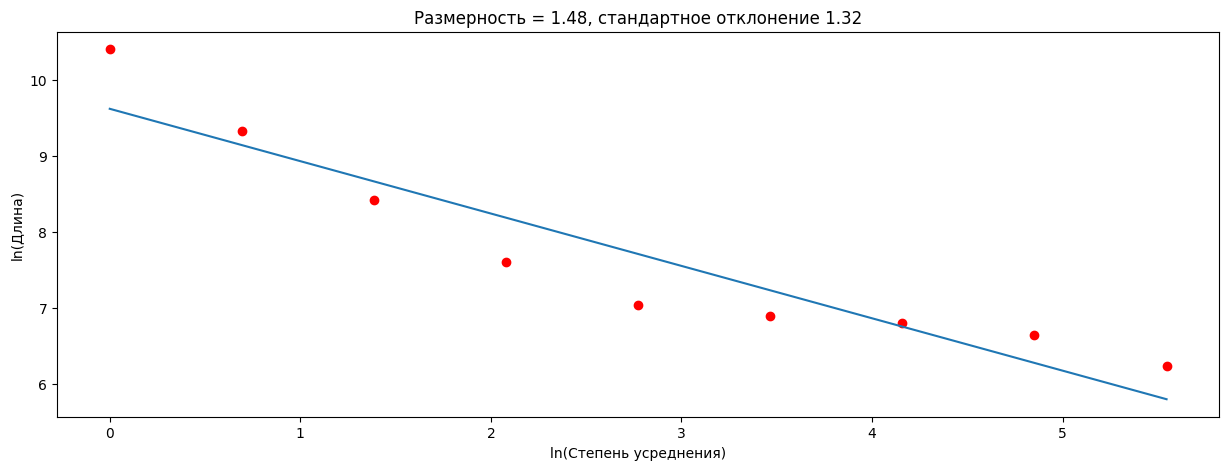

In [11]:
Dimension_Avg = Dimension_avg(rnd, ['index', 'R'], iter=10)

Результаты расчета соответствуют ожиданиям, попробуем применить данные методы к временным рядам, отражающим курс валюты на временном периоде в различных временных интервалах.

<h2><font color='black'>
Исследование фрактальных особенной рынков валют (Значение курса)
</font><a id="p3"></a></h2>

В рамках исследования выбраны 4 валютные пары, с разным временным шагом.
Исследуются пары: USD/CAD, USD/CNY, USD/RUB, USD/TRY.

In [12]:
usdcad = pd.read_csv('data/usdcad/USDCAD_230401_230430(5m).csv', encoding='cp1251', sep=',')
usdcad['Дата'] = pd.to_datetime(usdcad['Дата'].astype(str) + ' ' + usdcad['Время'].astype(str))
usdcad = usdcad.drop(['Время'], axis=1)
usdcad['index'] = [float(i) for i in range(len(usdcad))]
usdcad['Объем'] = usdcad['Объем'].astype(float)
usdcad['numeric_date'] = pd.to_numeric(usdcad['Дата']).astype(float)*10**(-18)
usdcad = usdcad.reset_index(drop=True)
usdcad

,Дата,Открытие,Максимум,Минимум,Закрытие,Объем,index,numeric_date
0,2023-04-04 09:30:00,1.34160,1.34176,1.3409,1.34146,5125.0,0.0,1.680601
1,2023-04-04 09:35:00,1.34146,1.34183,1.3409,1.34143,4944.0,1.0,1.680601
2,2023-04-04 09:40:00,1.34143,1.34152,1.3409,1.34140,4691.0,2.0,1.680601
3,2023-04-04 09:45:00,1.34131,1.34152,1.3408,1.34129,7838.0,3.0,1.680602
4,2023-04-04 09:50:00,1.34124,1.34138,1.3407,1.34121,6506.0,4.0,1.680602
...,...,...,...,...,...,...,...,...
1194,2023-04-10 09:50:00,1.34872,1.34941,1.3483,1.34932,2710.0,1194.0,1.681120
1195,2023-04-10 09:55:00,1.34932,1.34967,1.3490,1.34958,2554.0,1195.0,1.681121
1196,2023-04-10 10:00:00,1.34949,1.34970,1.3490,1.34946,2759.0,1196.0,1.681121
1197,2023-04-10 10:05:00,1.34938,1.34974,1.3490,1.34943,3206.0,1197.0,1.681121


In [13]:
usdcny = pd.read_csv('data/usdcny/USDCNY_230301_230331.csv', encoding='cp1251', sep=',')
usdcny['Дата'] = pd.to_datetime(usdcny['Дата'].astype(str) + ' ' + usdcny['Время'].astype(str))
usdcny = usdcny.drop(['Время'], axis=1)
usdcny['index'] = [float(i) for i in range(len(usdcny))]
usdcny['Объем'] = usdcny['Объем'].astype(float)
usdcny['numeric_date'] = pd.to_numeric(usdcny['Дата']).astype(float)*10**(-18)
usdcny = usdcny.reset_index(drop=True)
usdcny

,Дата,Открытие,Максимум,Минимум,Закрытие,Объем,index,numeric_date
0,2023-03-01 01:35:00,6.9273,6.9273,6.9262,6.9262,2.0,0.0,1.677635
1,2023-03-01 01:40:00,6.9267,6.9321,6.9267,6.9310,5.0,1.0,1.677635
2,2023-03-01 01:45:00,6.9283,6.9283,6.9246,6.9246,3.0,2.0,1.677635
3,2023-03-01 01:50:00,6.9265,6.9270,6.9261,6.9270,4.0,3.0,1.677635
4,2023-03-01 01:55:00,6.9257,6.9257,6.9228,6.9228,5.0,4.0,1.677636
...,...,...,...,...,...,...,...,...
1494,2023-03-14 06:25:00,6.8585,6.8651,6.8585,6.8651,14.0,1494.0,1.678775
1495,2023-03-14 06:30:00,6.8643,6.8650,6.8637,6.8650,14.0,1495.0,1.678775
1496,2023-03-14 06:35:00,6.8645,6.8660,6.8645,6.8655,15.0,1496.0,1.678776
1497,2023-03-14 06:40:00,6.8648,6.8655,6.8648,6.8654,15.0,1497.0,1.678776


In [14]:
usdrub = pd.read_csv('data/usdrub/USDRUB_191001_191031(15m).csv', encoding='cp1251', sep=',')
usdrub = usdrub[:2000]
usdrub['Дата'] = pd.to_datetime(usdrub['Дата'].astype(str) + ' ' + usdrub['Время'].astype(str))
usdrub = usdrub.drop(['Время'], axis=1)
usdrub['index'] = [float(i) for i in range(len(usdrub))]
usdrub['Объем'] = usdrub['Объем'].astype(float)
usdrub['numeric_date'] = pd.to_numeric(usdrub['Дата']).astype(float)*10**(-18)
usdrub = usdrub.reset_index(drop=True)
usdrub

,Дата,Открытие,Максимум,Минимум,Закрытие,Объем,index,numeric_date
0,2019-10-08 02:30:00,64.9489,64.9638,64.9140,64.9557,303.0,0.0,1.570502
1,2019-10-08 02:45:00,64.9545,64.9637,64.9490,64.9557,287.0,1.0,1.570503
2,2019-10-08 03:00:00,64.9637,64.9637,64.9440,64.9557,286.0,2.0,1.570504
3,2019-10-08 03:15:00,64.9554,64.9568,64.9370,64.9555,297.0,3.0,1.570505
4,2019-10-08 03:30:00,64.9547,64.9620,64.9300,64.9551,386.0,4.0,1.570505
...,...,...,...,...,...,...,...,...
1096,2019-10-23 07:00:00,63.7307,63.7940,63.6590,63.7050,2502.0,1096.0,1.571814
1097,2019-10-23 07:15:00,63.7050,63.7891,63.6437,63.7534,12144.0,1097.0,1.571815
1098,2019-10-23 07:30:00,63.7486,63.8615,63.6901,63.8024,10159.0,1098.0,1.571816
1099,2019-10-23 07:45:00,63.8220,63.8573,63.7733,63.8502,9484.0,1099.0,1.571817


In [15]:
usdtry = pd.read_csv('data/usdtry/USDTRY_221101_221130(1h).csv', encoding='cp1251', sep=',')
usdtry['Дата'] = pd.to_datetime(usdtry['Дата'].astype(str) + ' ' + usdtry['Время'].astype(str))
usdtry = usdtry.drop(['Время'], axis=1)
usdtry['index'] = [float(i) for i in range(len(usdtry))]
usdtry['Объем'] = usdtry['Объем'].astype(float)
usdtry['numeric_date'] = pd.to_numeric(usdtry['Дата']).astype(float)*10**(-18)
usdtry = usdtry.reset_index(drop=True)
usdtry

,Дата,Открытие,Максимум,Минимум,Закрытие,Объем,index,numeric_date
0,2022-11-01 01:00:00,18.59750,18.66550,18.58084,18.61980,28342.0,0.0,1.667264
1,2022-11-01 02:00:00,18.61076,18.65080,18.57822,18.61960,27212.0,1.0,1.667268
2,2022-11-01 03:00:00,18.61396,18.62530,18.57045,18.61020,9570.0,2.0,1.667272
3,2022-11-01 04:00:00,18.61040,18.61900,18.56822,18.61116,10453.0,3.0,1.667275
4,2022-11-01 05:00:00,18.61116,18.61990,18.56806,18.60960,9266.0,4.0,1.667279
...,...,...,...,...,...,...,...,...
543,2022-11-30 20:00:00,18.62221,18.63160,18.60408,18.62880,5092.0,543.0,1.669838
544,2022-11-30 21:00:00,18.62760,18.63250,18.60416,18.62887,5598.0,544.0,1.669842
545,2022-11-30 22:00:00,18.63036,18.63404,18.57960,18.58950,4315.0,545.0,1.669846
546,2022-11-30 23:00:00,18.60990,18.63700,18.57580,18.63430,4378.0,546.0,1.669849


Отобразим графики

В силу того, что по разным валютам торгоговые сессии имею свойство перерыва торговли, значения на графики отображены по порядку чтобы на графике не отражались перерывы в торгах, таким образом как если бы торги шли непрерывно.

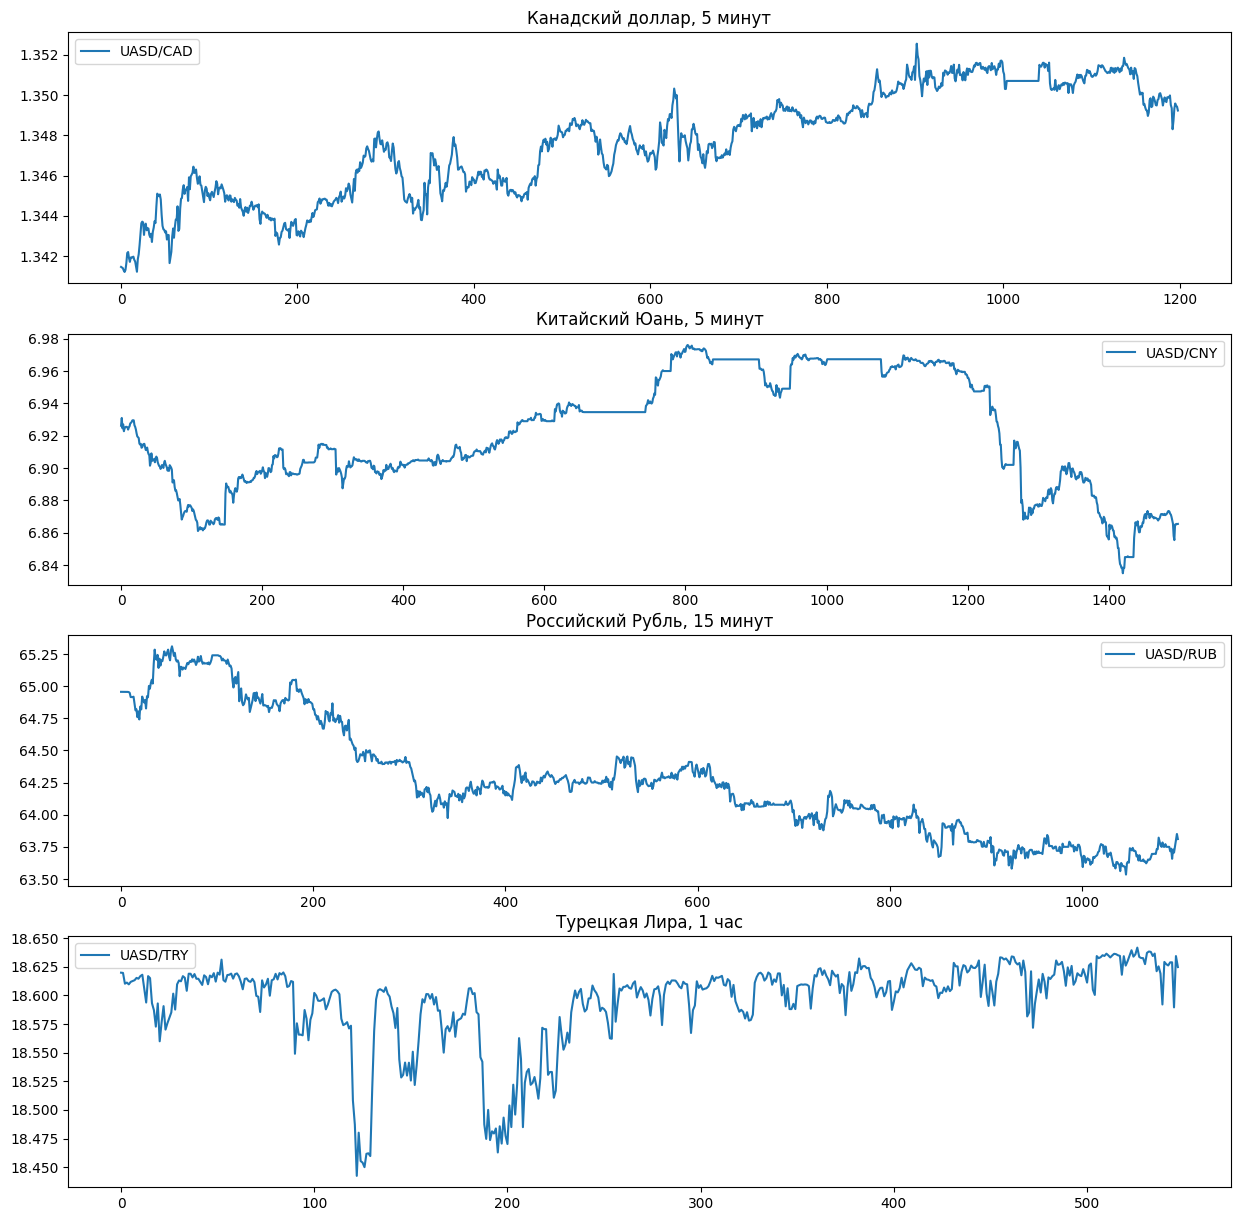

In [16]:
plt.figure(figsize=(15, 15))

plt.subplot(411)
plt.plot(usdcad['index'], usdcad['Закрытие'], label='UASD/CAD')
plt.title('Канадский доллар, 5 минут')
plt.legend()

plt.subplot(412)
plt.plot(usdcny['index'], usdcny['Закрытие'], label='UASD/СNY')
plt.title('Китайский Юань, 5 минут')
plt.legend()

plt.subplot(413)
plt.plot(usdrub['index'], usdrub['Закрытие'], label='UASD/RUB')
plt.title('Российский Рубль, 15 минут')
plt.legend()

plt.subplot(414)
plt.plot(usdtry['index'], usdtry['Закрытие'], label='UASD/TRY')
plt.title('Турецкая Лира, 1 час')
plt.legend()
plt.show()

Все методы определения фрактальной размрености, сводятся к тому чтобы уменьшая масштаб отслеживать шаг изменения длины или свойств кривой. Как правило изменение должно сводиться к степенному закон - эта степень и является фрактальной размреонстью.

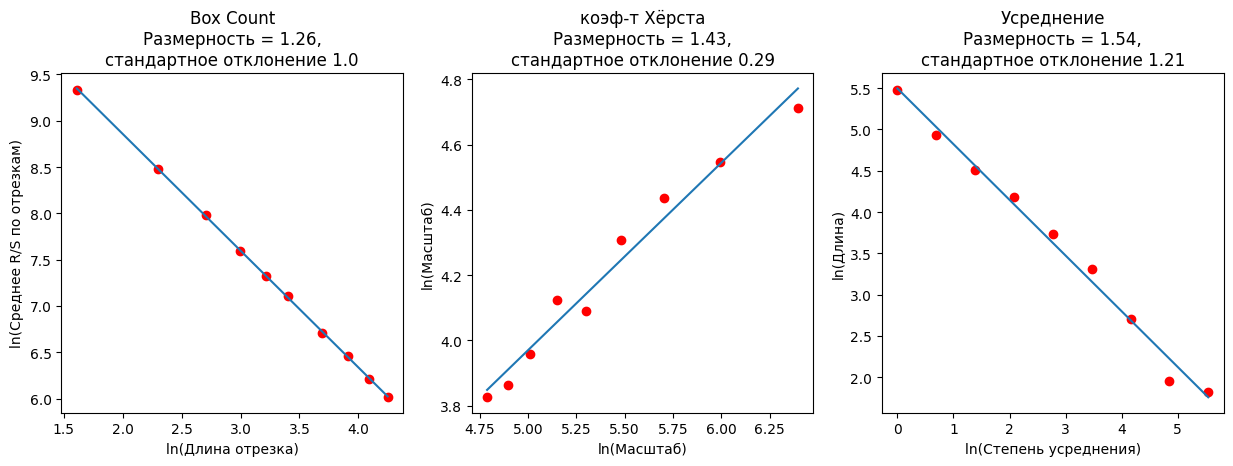

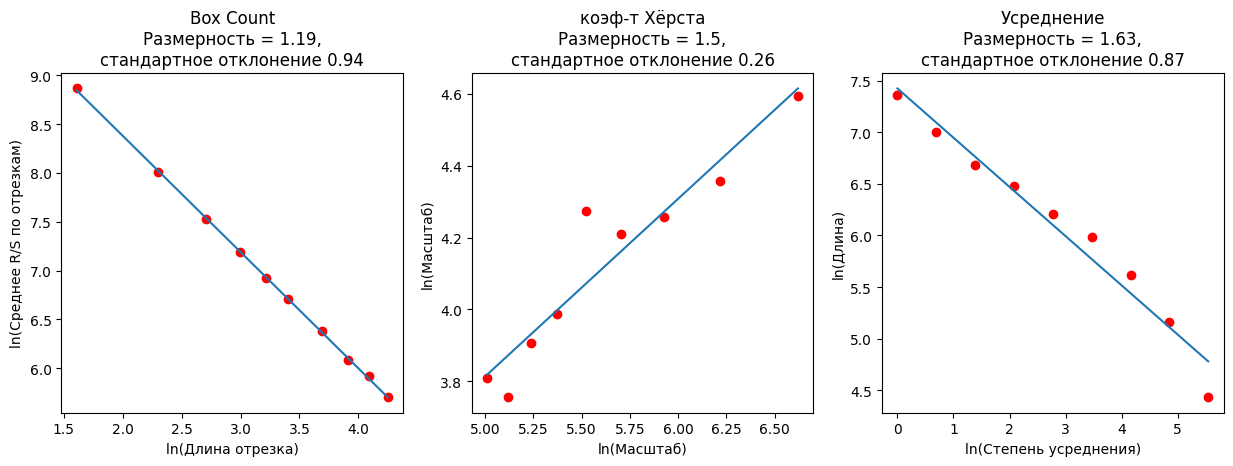

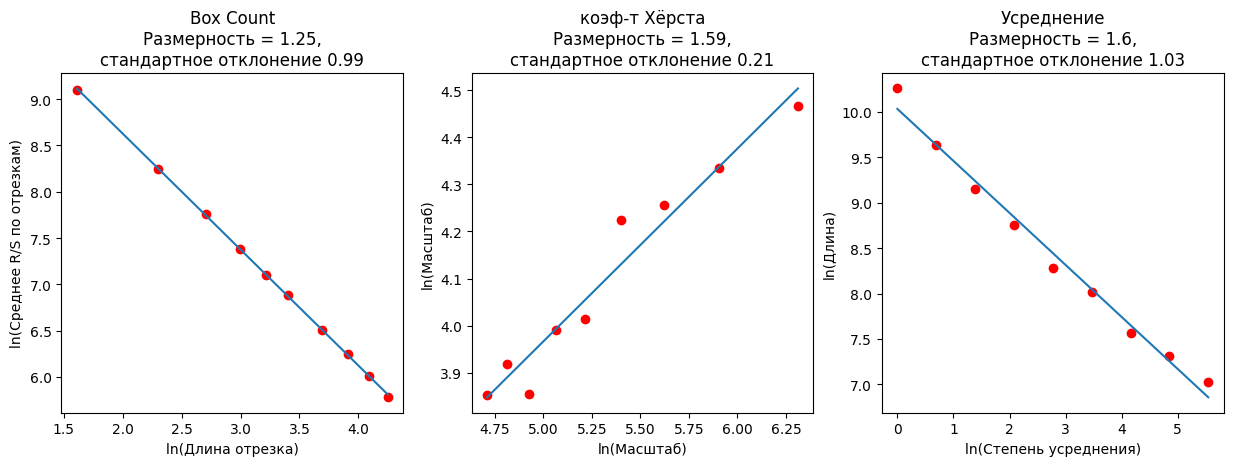

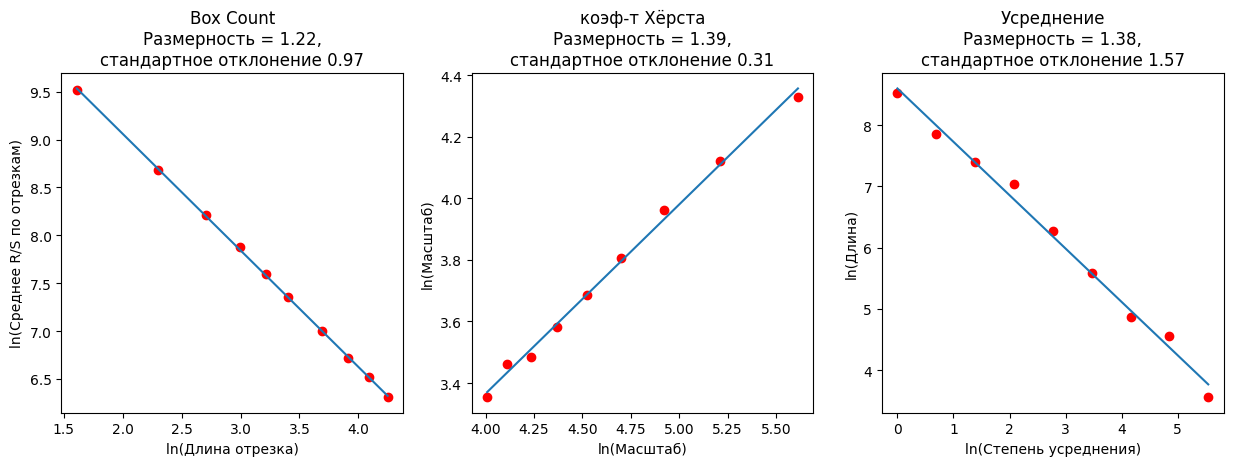

In [17]:
pairs = [usdcad, usdcny, usdrub, usdtry]
titles = ['Пара USD/CAD','Пара USD/CNY','Пара USD/RUB','Пара USD/TRY']

for pair, title in zip(pairs, titles):
    pair['Закрытие'] *= 1000 
    
    plt.figure(figsize=(100,20), dpi=130)
    plt.plot(pair['index'], pair['Закрытие'])
    plt.axis('off')
    plt.savefig(f'tmp.jpg', bbox_inches='tight', pad_inches=0)
    plt.close()
    
    D_BC = Dimension_BC_img(f'tmp.jpg', show=False)    
    D_Hurst = Hurst(pair['Закрытие'], show=False)
    D_avg = Dimension_avg(pair, ['numeric_date', 'Закрытие'], show=False, iter=10) 
    
    plt.figure(figsize=(15,15))
    
    # Box Count
    plt.subplot(331)
    z = np.polyfit(D_BC[0], D_BC[1], 1)
    p = np.poly1d(z)
    # Направление
    D = round(-p[1], 2)
    std = round(np.std(D_BC[1]), 2)
    # График
    plt.scatter(D_BC[0], D_BC[1], color='red')
    plt.plot(D_BC[0], p(D_BC[0]))
    plt.title(f"Box Count\nРазмерность = {D},\nстандартное отклонение {std}")
    plt.xlabel("ln(Длина отрезка)")
    plt.ylabel("ln(Среднее R/S по отрезкам)")
    
    # коэф-т Хёрста
    plt.subplot(332)
    z = np.polyfit(D_Hurst['Масштаб'], D_Hurst['Коэффициент'], 1)
    p = np.poly1d(z)
    # Направление
    D = round(2 - p[1], 2)
    std = round(np.std(D_Hurst['Коэффициент']), 2)
    # График
    plt.scatter(D_Hurst['Масштаб'], D_Hurst['Коэффициент'], color='red')
    plt.plot(D_Hurst['Масштаб'], p(D_Hurst['Масштаб']))
    plt.title(f"коэф-т Хёрста\nРазмерность = {D},\nстандартное отклонение {std}")
    plt.xlabel("ln(Масштаб)")
    plt.ylabel("ln(Масштаб)")
    
    # Размреность через усреднение
    plt.subplot(333)
    z = np.polyfit(D_avg['Коэффициент'], D_avg['Длина'], 1)
    p = np.poly1d(z)  
    
    std = round(np.std(D_avg['Длина']), 2)
    D = round(D_avg['Размерность'].mean(), 2)
    
    plt.scatter(D_avg['Коэффициент'], D_avg['Длина'], color='red')
    plt.plot(D_avg['Коэффициент'], p(D_avg['Коэффициент']))
    plt.title(f"Усреднение\nРазмерность = {D},\nстандартное отклонение {std}")
    plt.xlabel("ln(Степень усреднения)")
    plt.ylabel("ln(Длина)")
    
    # plt.suptitle(f'{title}')
    plt.show()

<h2><font color='black'>
Исследование фрактальных особенной рынков валют (Объем торгов)
</font><a id="p4"></a></h2>

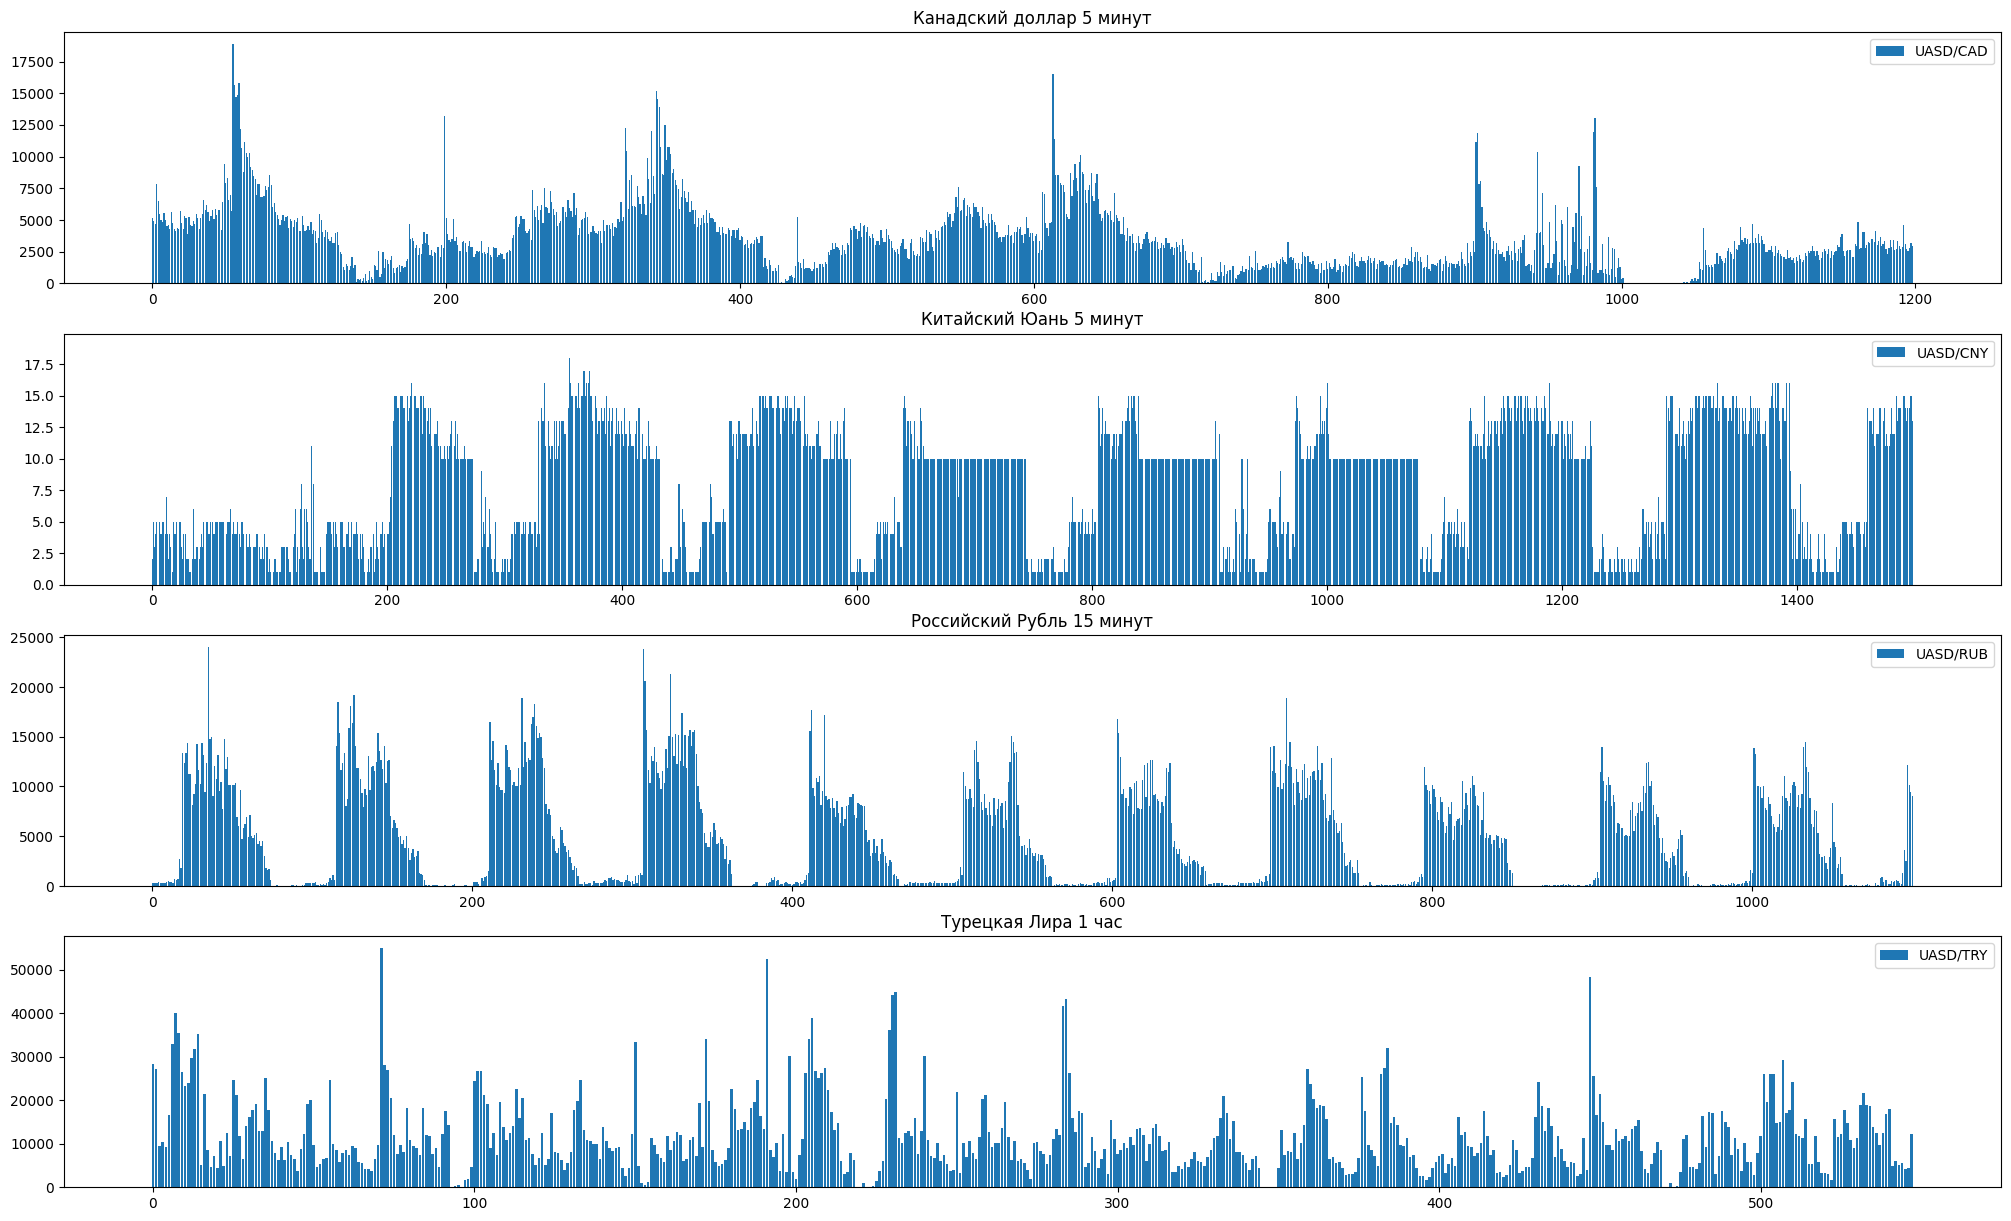

In [18]:
plt.figure(figsize=(25, 15))

plt.subplot(411)
plt.bar(usdcad['index'], usdcad['Объем'], label='UASD/CAD')
plt.title('Канадский доллар 5 минут')
plt.legend()

plt.subplot(412)
plt.bar(usdcny['index'], usdcny['Объем'], label='UASD/СNY')
plt.title('Китайский Юань 5 минут')
plt.legend()

plt.subplot(413)
plt.bar(usdrub['index'], usdrub['Объем'], label='UASD/RUB')
plt.title('Российский Рубль 15 минут')
plt.legend()

plt.subplot(414)
plt.bar(usdtry['index'], usdtry['Объем'], label='UASD/TRY')
plt.title('Турецкая Лира 1 час')
plt.legend()

plt.show()

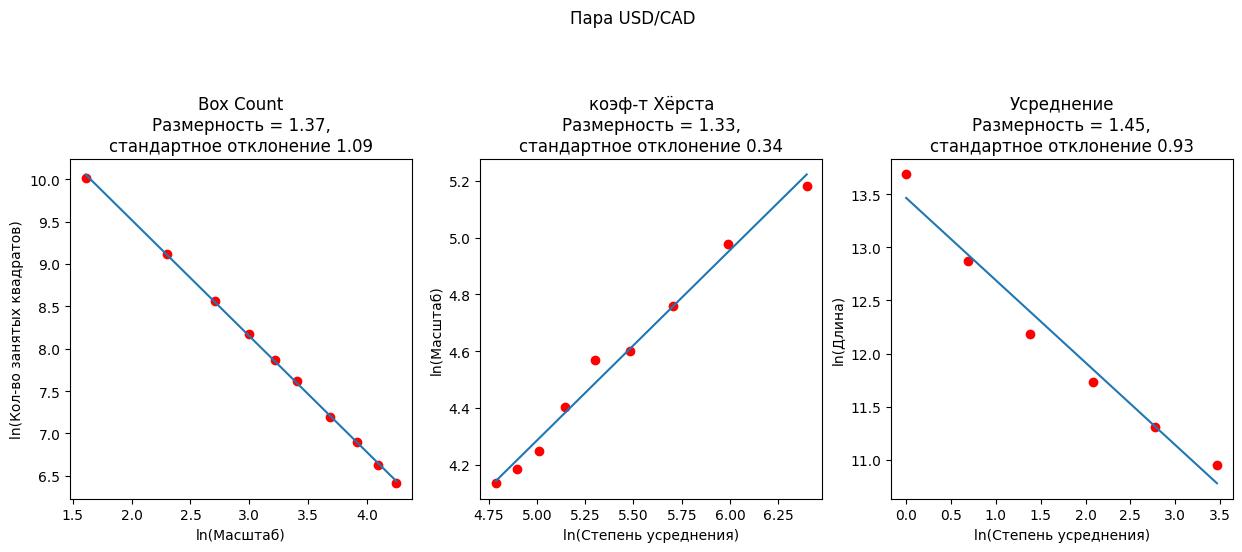

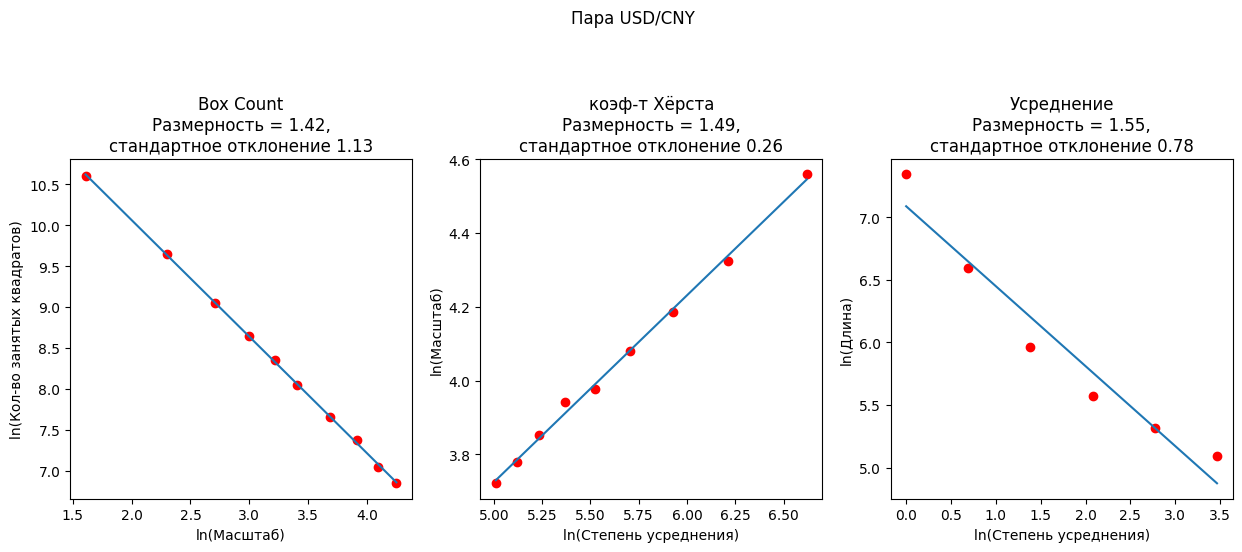

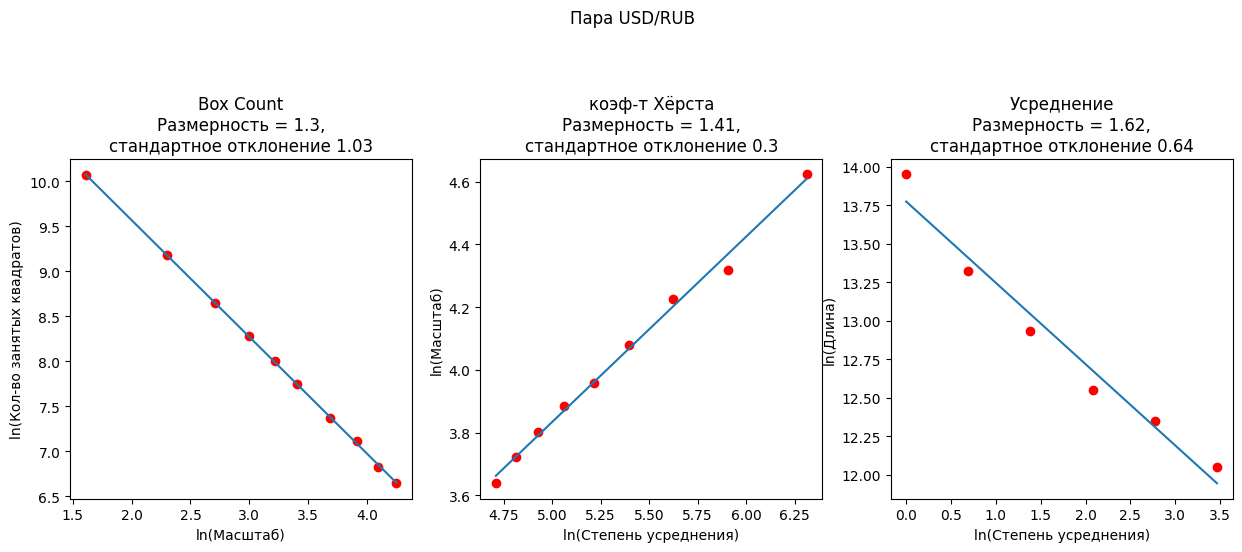

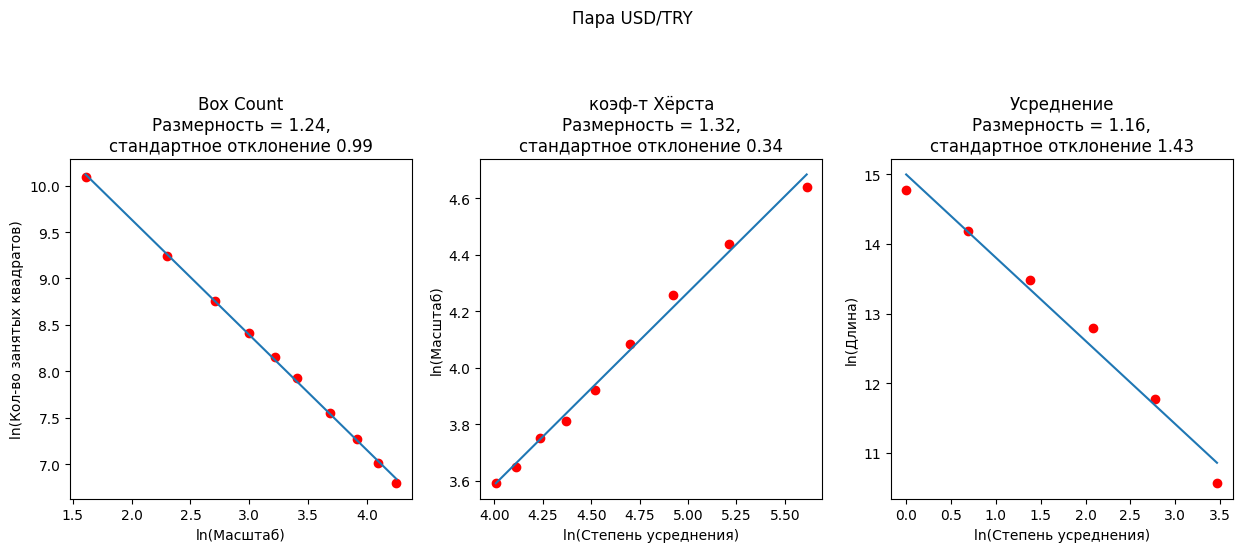

In [36]:
pairs = [usdcad, usdcny, usdrub, usdtry]
titles = ['Пара USD/CAD','Пара USD/CNY','Пара USD/RUB','Пара USD/TRY']

for pair, title in zip(pairs, titles):    
    plt.figure(figsize=(100,20), dpi=130)
    plt.plot(pair['index'], pair['Объем'])
    plt.axis('off')
    plt.savefig(f'tmp.jpg', bbox_inches='tight', pad_inches=0)
    plt.close()
    
    D_BC = Dimension_BC_img(f'tmp.jpg', show=False)    
    D_Hurst = Hurst(pair['Объем'], show=False)
    D_avg = Dimension_avg(pair, ['numeric_date', 'Объем'], show=False) 
    
    plt.figure(figsize=(15,15))
    
    # Box Count
    plt.subplot(331)
    z = np.polyfit(D_BC[0], D_BC[1], 1)
    p = np.poly1d(z)
    # Направление
    D = round(-p[1], 2)
    std = round(np.std(D_BC[1]), 2)
    # График
    plt.scatter(D_BC[0], D_BC[1], color='red')
    plt.plot(D_BC[0], p(D_BC[0]))
    plt.title(f"Box Count\nРазмерность = {D},\nстандартное отклонение {std}")
    plt.xlabel("ln(Масштаб)")
    plt.ylabel("ln(Кол-во занятых квадратов)")
    
    # коэф-т Хёрста
    plt.subplot(332)
    z = np.polyfit(D_Hurst['Масштаб'], D_Hurst['Коэффициент'], 1)
    p = np.poly1d(z)
    # Направление
    D = round(2 - p[1], 2)
    std = round(np.std(D_Hurst['Коэффициент']), 2)
    # График
    plt.scatter(D_Hurst['Масштаб'], D_Hurst['Коэффициент'], color='red')
    plt.plot(D_Hurst['Масштаб'], p(D_Hurst['Масштаб']))
    plt.title(f"коэф-т Хёрста\nРазмерность = {D},\nстандартное отклонение {std}")
    plt.xlabel("ln(Степень усреднения)")
    plt.ylabel("ln(Масштаб)")
    
    # Размреность через усреднение
    plt.subplot(333)
    z = np.polyfit(D_avg['Коэффициент'], D_avg['Длина'], 1)
    p = np.poly1d(z)  
    
    std = round(np.std(D_avg['Длина']), 2)
    D = round(D_avg['Размерность'].mean(), 2)
    
    plt.scatter(D_avg['Коэффициент'], D_avg['Длина'], color='red')
    plt.plot(D_avg['Коэффициент'], p(D_avg['Коэффициент']))
    plt.title(f"Усреднение\nРазмерность = {D},\nстандартное отклонение {std}")
    plt.xlabel("ln(Степень усреднения)")
    plt.ylabel("ln(Длина)")
    
    plt.suptitle(f'{title}')
    plt.show()

<h2><font color='black'>
Оценка корреляции между фрактальной размерностью и скользящими средними, трендами
</font><a id="p5"></a></h2>

In [20]:
usdcad = pd.read_excel('data/usdcad/arr.xlsx')
usdcad = usdcad[:1200]
usdcad['Закрытие'] = usdcad['Закрытие'].astype(float)
usdcad['Объем'] = usdcad['Объем'].astype(float)
usdcad = SMA(usdcad, ['Закрытие', 'Объем'], window=400)
usdcad = Trend(usdcad, ['index', 'Закрытие'], window=400)
usdcad = Trend(usdcad, ['index', 'Объем'], window=400)

In [21]:
lines = usdcad.filter(like='Размерность').columns
cols = usdcad.filter(regex='^О|^З|^S|^Т').columns

d = (usdcad.corr().round(2).loc[lines, cols].style\
.background_gradient(cmap='Greens')\
.map(lambda v: 'border: 3px solid orange;' if (v >= 0.6) or (v <= -0.6) else None))\
.format('{:,.2f}')

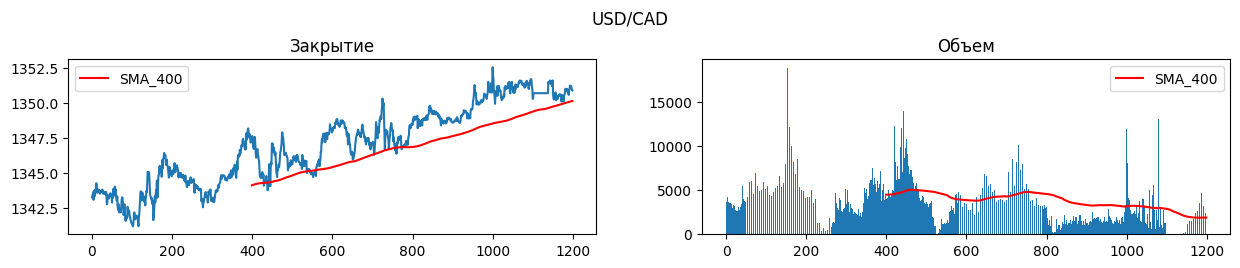

,Открытие,Закрытие,Объем,SMA_Закрытие_400,SMA_Объем_400,Тренд_Закрытие_400,Тренд_Объем_400
Размерность(Хёрст)_Закрытие_400,-0.54,-0.55,0.39,-0.67,0.56,0.14,0.48
Размерность(Хёрст)_Объем_400,-0.09,-0.08,-0.28,0.03,-0.06,-0.13,0.40
Размерность(Уср)_Закрытие_400,-0.68,-0.68,0.37,-0.76,0.67,-0.26,0.49
Размерность(Уср)_Объем_400,-0.59,-0.58,0.15,-0.69,0.71,-0.57,0.24
Размерность(BC)_Закрытие_400,0.36,0.36,-0.20,0.43,-0.59,0.33,-0.13
Размерность(BC)_Объем_400,0.04,0.04,0.01,0.14,-0.24,0.28,0.45


In [22]:
plt.figure(figsize=(15,5))

plt.subplot(221)
plt.plot(usdcad['index'], usdcad['Закрытие'])
plt.plot(usdcad['index'], usdcad['SMA_Закрытие_400'], label='SMA_400', color='red')
plt.title('Закрытие')
plt.legend()

plt.subplot(222)
plt.bar(usdcad['index'], usdcad['Объем'])
plt.plot(usdcad['index'], usdcad['SMA_Объем_400'], label='SMA_400', color='red')
plt.title('Объем')
plt.legend()

plt.suptitle(f'USD/CAD')
plt.show()
plt.close()
display(d)

In [23]:
lines = usdcad.filter(like='Размерность').columns

In [24]:
usdcny = pd.read_excel('data/usdcny/arr.xlsx')
usdcny['Закрытие'] = usdcny['Закрытие'].astype(float)
usdcny['Объем'] = usdcny['Объем'].astype(float)
usdcny = SMA(usdcny, ['Закрытие', 'Объем'], window=400)
usdcny = Trend(usdcny, ['index', 'Закрытие'], window=400)
usdcny = Trend(usdcny, ['index', 'Объем'], window=400)

In [25]:
lines = usdcny.filter(like='Размерность').columns
cols = usdcny.filter(regex='^О|^З|^S|^Т').columns

d = (usdcny.corr().round(2).loc[lines, cols].style\
.background_gradient(cmap='Greens')\
.map(lambda v: 'border: 3px solid orange;' if (v >= 0.6) or (v <= -0.6) else None))\
.format('{:,.2f}')

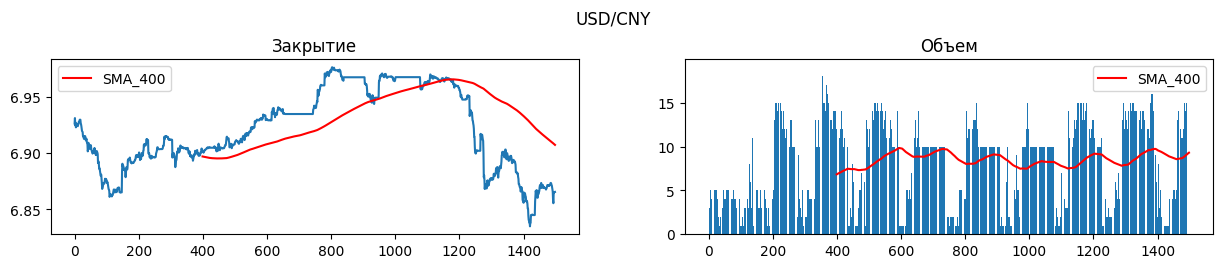

,Открытие,Закрытие,Объем,SMA_Закрытие_400,SMA_Объем_400,Тренд_Закрытие_400,Тренд_Объем_400
Размерность(Хёрст)_Закрытие_400,0.28,0.28,0.08,0.39,-0.34,0.11,-0.19
Размерность(Хёрст)_Объем_400,-0.43,-0.43,0.08,-0.33,0.20,-0.42,-0.21
Размерность(Уср)_Закрытие_400,0.33,0.33,0.01,0.11,0.71,0.14,-0.57
Размерность(Уср)_Объем_400,0.73,0.72,-0.10,0.73,-0.11,0.42,-0.50
Размерность(BC)_Закрытие_400,0.36,0.36,-0.12,0.05,-0.11,0.35,0.09
Размерность(BC)_Объем_400,-0.53,-0.53,0.03,-0.37,0.24,-0.44,0.03


In [26]:
plt.figure(figsize=(15,5))

plt.subplot(221)
plt.plot(usdcny['index'], usdcny['Закрытие'])
plt.plot(usdcny['index'], usdcny['SMA_Закрытие_400'], label='SMA_400', color='red')
plt.title('Закрытие')
plt.legend()

plt.subplot(222)
plt.bar(usdcny['index'], usdcny['Объем'])
plt.plot(usdcny['index'], usdcny['SMA_Объем_400'], label='SMA_400', color='red')
plt.title('Объем')
plt.legend()

plt.suptitle(f'USD/CNY')
plt.show()
plt.close()
display(d)

In [27]:
usdrub = pd.read_excel('data/usdrub/arr.xlsx')
usdrub['Закрытие'] = usdrub['Закрытие'].astype(float)
usdrub['Объем'] = usdrub['Объем'].astype(float)
usdrub = SMA(usdrub, ['Закрытие', 'Объем'], window=400)
usdrub = Trend(usdrub, ['index', 'Закрытие'], window=400)
usdrub = Trend(usdrub, ['index', 'Объем'], window=400)

In [28]:
lines = usdrub.filter(like='Размерность').columns
cols = usdrub.filter(regex='^О|^З|^S|^Т').columns

d = (usdrub.corr().round(2).loc[lines, cols].style\
.background_gradient(cmap='Greens')\
.map(lambda v: 'border: 3px solid orange;' if (v >= 0.6) or (v <= -0.6) else None))\
.format('{:,.2f}')

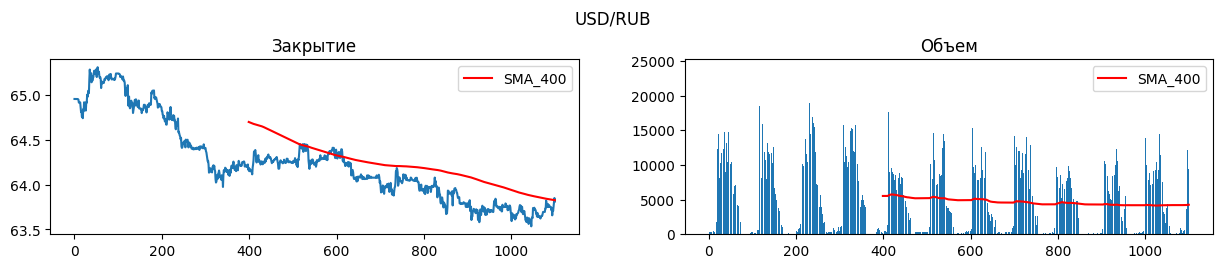

,Открытие,Закрытие,Объем,SMA_Закрытие_400,SMA_Объем_400,Тренд_Закрытие_400,Тренд_Объем_400
Размерность(Хёрст)_Закрытие_400,0.56,0.56,-0.24,0.67,0.55,-0.46,-0.02
Размерность(Хёрст)_Объем_400,-0.31,-0.32,0.02,-0.32,-0.20,-0.27,-0.07
Размерность(Уср)_Закрытие_400,0.67,0.68,0.03,0.75,0.81,-0.68,-0.26
Размерность(Уср)_Объем_400,-0.00,-0.01,-0.06,-0.01,0.03,-0.15,-0.03
Размерность(BC)_Закрытие_400,-0.53,-0.54,-0.02,-0.62,-0.66,0.71,0.20
Размерность(BC)_Объем_400,-0.12,-0.10,0.10,0.07,0.06,-0.33,0.09


In [29]:
plt.figure(figsize=(15,5))

plt.subplot(221)
plt.plot(usdrub['index'], usdrub['Закрытие'])
plt.plot(usdrub['index'], usdrub['SMA_Закрытие_400'], label='SMA_400', color='red')
plt.title('Закрытие')
plt.legend()

plt.subplot(222)
plt.bar(usdrub['index'], usdrub['Объем'])
plt.plot(usdrub['index'], usdrub['SMA_Объем_400'], label='SMA_400', color='red')
plt.title('Объем')
plt.legend()

plt.suptitle(f'USD/RUB')
plt.show()
plt.close()
display(d)

In [30]:
usdtry = pd.read_excel('data/usdtry/arr.xlsx')
usdtry['Закрытие'] = usdtry['Закрытие'].astype(float)
usdtry['Объем'] = usdtry['Объем'].astype(float)
usdtry = SMA(usdtry, ['Закрытие', 'Объем'], window=200)
usdtry = Trend(usdtry, ['index', 'Закрытие'], window=200)
usdtry = Trend(usdtry, ['index', 'Объем'], window=200)

In [31]:
lines = usdtry.filter(like='Размерность').columns
cols = usdtry.filter(regex='^О|^З|^S|^Т').columns

d = (usdtry.corr().round(2).loc[lines, cols].style\
.background_gradient(cmap='Greens')\
.map(lambda v: 'border: 3px solid orange;' if (v >= 0.6) or (v <= -0.6) else None))\
.format('{:,.2f}')

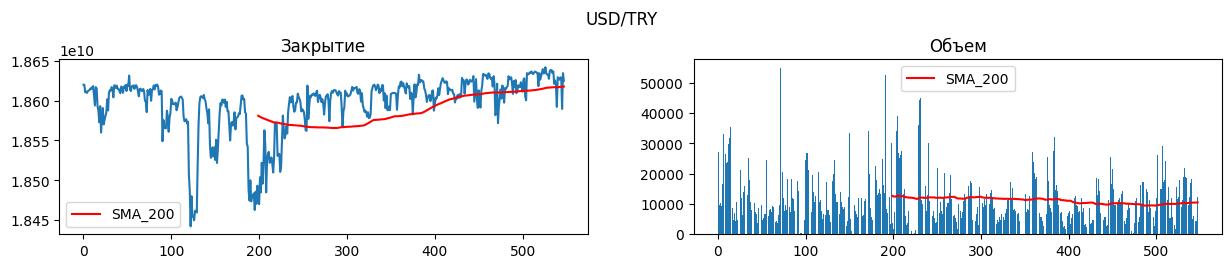

,Открытие,Закрытие,Объем,SMA_Закрытие_200,SMA_Объем_200,Тренд_Закрытие_200,Тренд_Объем_200
Размерность(Хёрст)_Закрытие_200,-0.48,-0.49,0.04,-0.94,0.91,-0.15,0.01
Размерность(Хёрст)_Объем_200,0.34,0.34,-0.05,0.17,-0.16,0.56,-0.40
Размерность(Уср)_Закрытие_200,-0.40,-0.40,-0.04,-0.80,0.78,0.13,-0.30
Размерность(Уср)_Объем_200,0.03,0.06,-0.05,-0.25,0.16,0.30,-0.31
Размерность(BC)_Закрытие_200,0.38,0.38,0.03,0.83,-0.78,0.03,0.19
Размерность(BC)_Объем_200,-0.45,-0.44,0.05,-0.75,0.77,-0.20,0.07


In [32]:
plt.figure(figsize=(15,5))

plt.subplot(221)
plt.plot(usdtry['index'], usdtry['Закрытие'])
plt.plot(usdtry['index'], usdtry['SMA_Закрытие_200'], label='SMA_200', color='red')
plt.title('Закрытие')
plt.legend()

plt.subplot(222)
plt.bar(usdtry['index'], usdtry['Объем'])
plt.plot(usdtry['index'], usdtry['SMA_Объем_200'], label='SMA_200', color='red')
plt.title('Объем')
plt.legend()

plt.suptitle(f'USD/TRY')
plt.show()
plt.close()
display(d)

<h2><font color='black'>
Заключение
</font><a id="p7"></a></h2>

По результатам работы мы смогли убедиться что структуры рынков такие как курс валюты и объем торгов имеют самоподобную структуру. Можно сделать вывод что они обладают свойствами фрактальности. также можно выделить тот факт, что фрактальная структура обладает свойством памяти, то-есть изменения в прошлом несут свой вклад в настоящее. Сильня корреляция между фрактальной размерностью и скользящими средним показывает зависимость между прошлым и настоящим. Корреляция с углом направления тренда, показывает возможность применения фрактальной размерности для дальнейшего прогнозирования. Особенно эти свойства сильно выделаются на трендоустойчивых участках без сильных колейбаний. Кроме того каждая валютная пара показала свою особенную фрактальную структура, отразив особенности каждого из рынков.